In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

In [2]:
# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

In [3]:
# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Reading the automobile consulting company file on which analysis needs to be done
cardata=pd.read_csv('CarPrice_Assignment.csv')
print(cardata.shape)
# shape of the data
cardata.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cardata.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
# information of the data
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# description of the data
cardata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# dropping car_ID based on business knowledge
cardata = cardata.drop('car_ID',axis=1)

In [7]:
# Calculating the Missing Values % contribution in DF
cardata.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Text(0.5, 0, 'Continuous Variable')

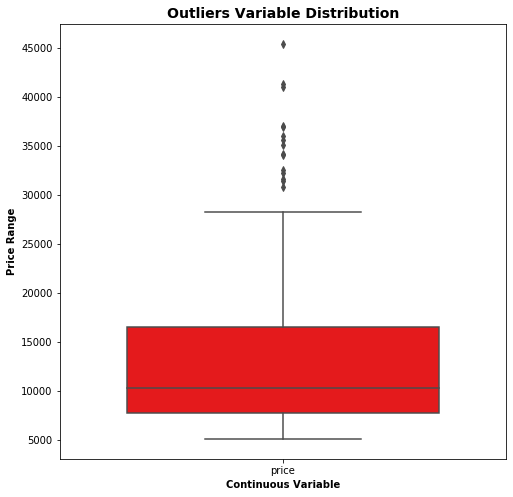

In [8]:
# Outlier Analysis of target variable with maximum amount of Inconsistency
outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=cardata[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

In [9]:
#here are some price ranges above 36000 which can be termed as outliers but lets not remove it 
#rather we will use standarization scaling.

In [10]:
# Extracting Car Company from the CarName as per direction in Problem 
cardata['CarName'] = cardata['CarName'].str.split(' ',expand=True)

In [11]:
cardata['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
cardata['CarName']=cardata['CarName'].replace(({'maxda': 'Mazda', 
                                                    'nissan': 'Nissan', 
                                                    'porcshce': 'Porsche', 
                                                    'toyouta': 'Toyota', 
                                                    'vokswagen': 'Volkswagen', 
                                                    'vw': 'Volkswagen'}))

In [13]:
#cardata['symboling'] = pd.Categorical(cardata.symboling)
cardata['symboling'] = cardata['symboling'].astype(str)
print(cardata.dtypes)

symboling            object
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [21]:
# Segregation of Numerical and Categorical Variables/Columns
cat_col = cardata.select_dtypes(include=['object']).columns
num_col = cardata.select_dtypes(exclude=['object']).columns
df_cat = cardata[cat_col]
df_num = cardata[num_col] 
df_cat
df_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Text(0, 0.5, 'Count of Cars')

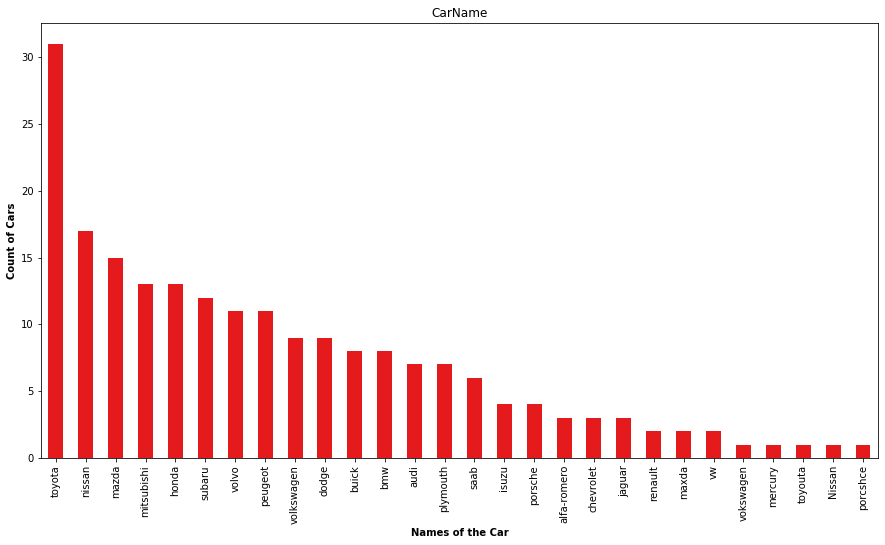

In [15]:
# Visualizing the different car names available
plt.rcParams['figure.figsize'] = [15,8]
ax=cardata['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

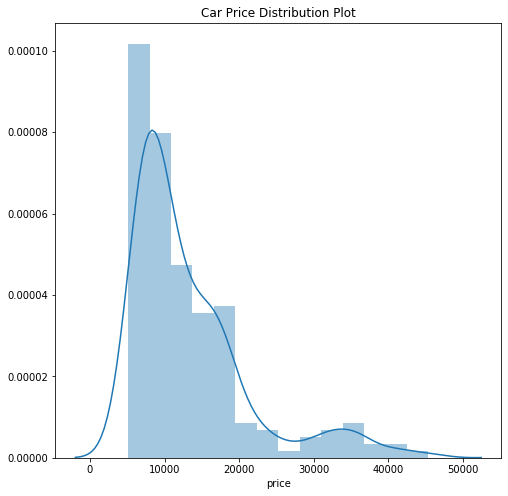

In [16]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(cardata['price'])

In [17]:
#The plots seems to be right skewed, the prices of almost all cars looks like less than 18000.

In [18]:
pairplot_cardata = sns.pairplot(cardata[num_col])

Error in callback <function flush_figures at 0x00000259FB9EB3A8> (for post_execute):


KeyboardInterrupt: 

Insights:
carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a poitive correlation with price.
carheight doesn't show any significant trend with price.
citympg , highwaympg - seem to have a significant negative correlation with price.

# Visualising few more Categorical Variables
Boxplot of all the categorical variables

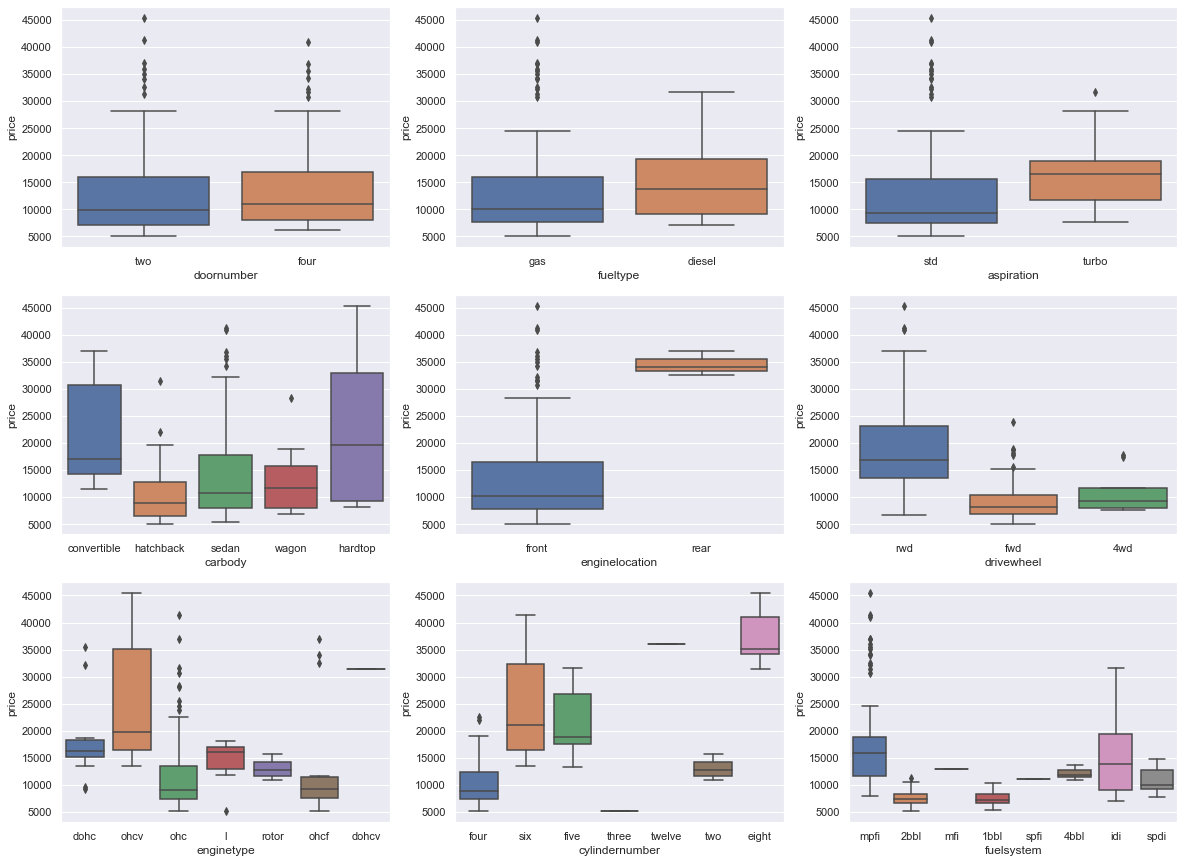

In [21]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = cardata)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = cardata)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = cardata)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = cardata)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cardata)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = cardata)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = cardata)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cardata)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cardata)
plt.show()

The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
All the types of carbody is relatively cheaper as compared to convertible carbody.
The cars with rear enginelocation are way expensive than cars with front enginelocation.
The price of car is directly proportional to no. of cylinders in most cases.
Enginetype ohcv comes into higher price range cars.
DoorNumber isn't affecting the price much.
HigerEnd cars seems to have rwd drivewheel

[Text(0, 0.5, 'Frequency of Car Body'), Text(0.5, 0, 'Car Body')]

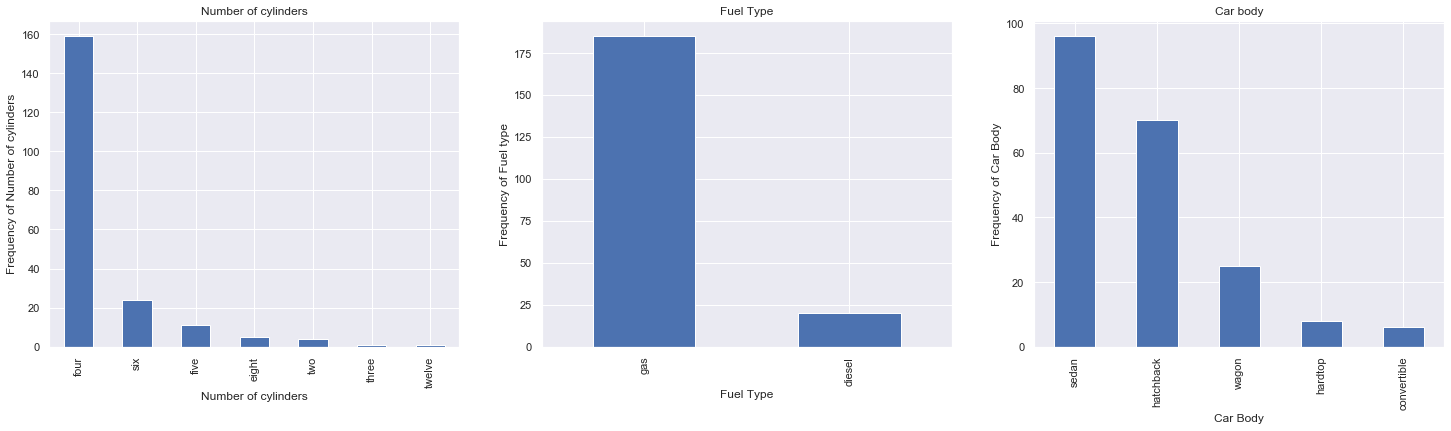

In [22]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cardata['cylindernumber'].value_counts().plot('bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = cardata['fueltype'].value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = cardata['carbody'].value_counts().plot('bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

Insights:
The number of cylinders used in most cars is four.
Number of Gas fueled cars are way more than diesel fueled cars.
Sedan is the most prefered car type.

Relationship between fuelsystem vs price with hue fueltype

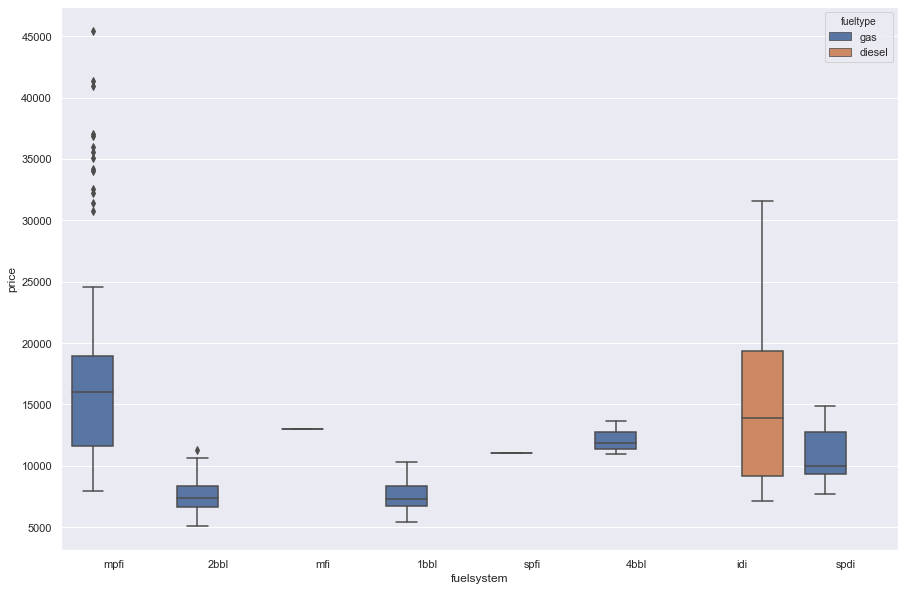

In [23]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = cardata)
plt.show()

Relationship between carbody vs price with hue enginelocation

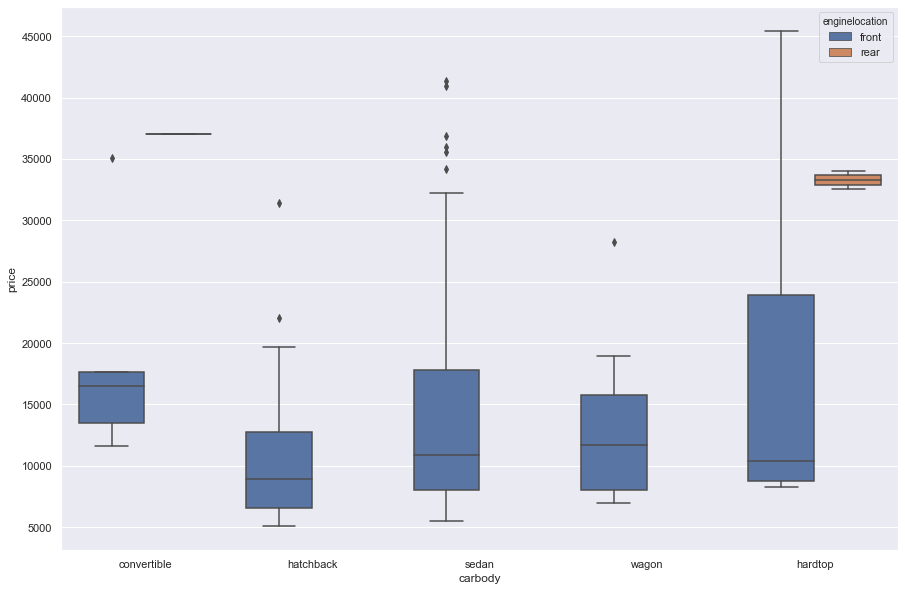

In [24]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = cardata)
plt.show()

Relationship between cylindernumber vs price with hue fueltype

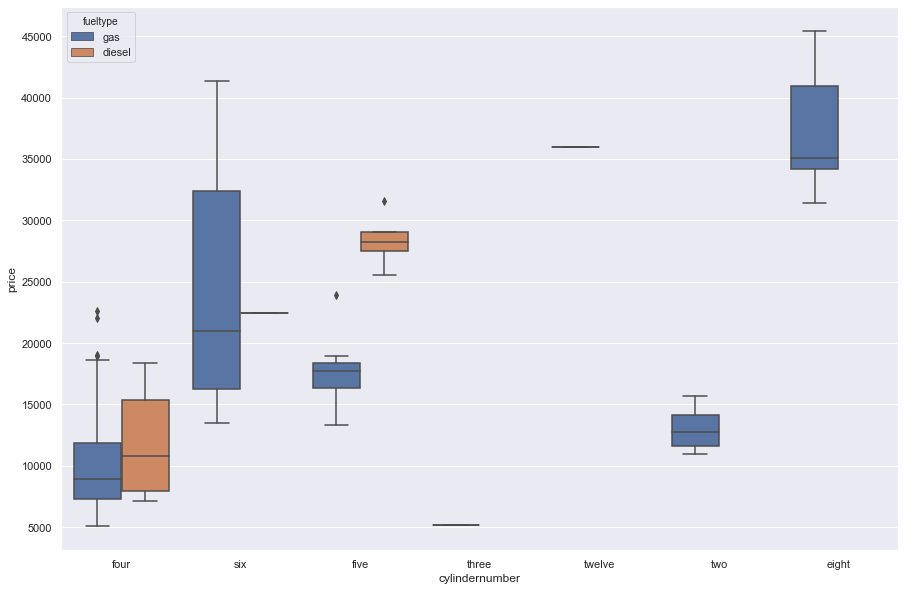

In [25]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = cardata)
plt.show()

<Figure size 1440x432 with 0 Axes>

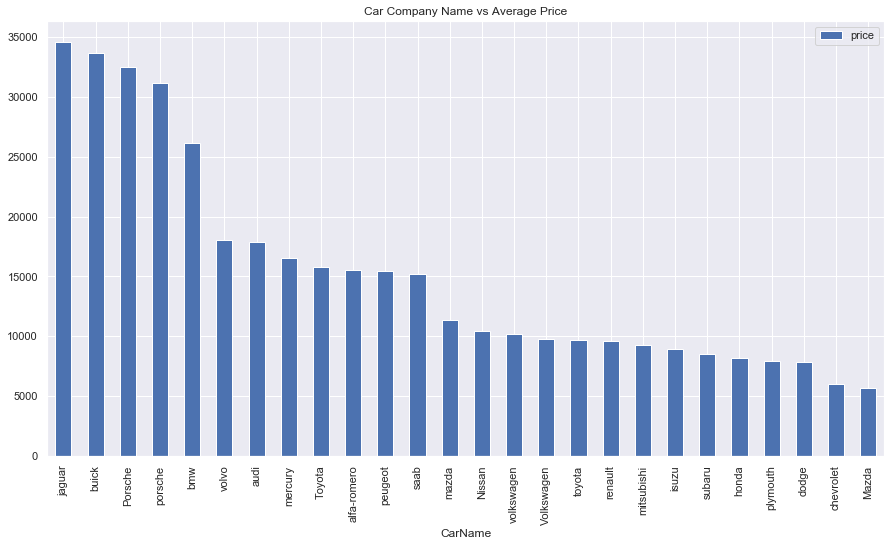

In [26]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(cardata.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

Insights:
Jaguar,Buick and porsche seems to have the highest average price.

<Figure size 1440x432 with 0 Axes>

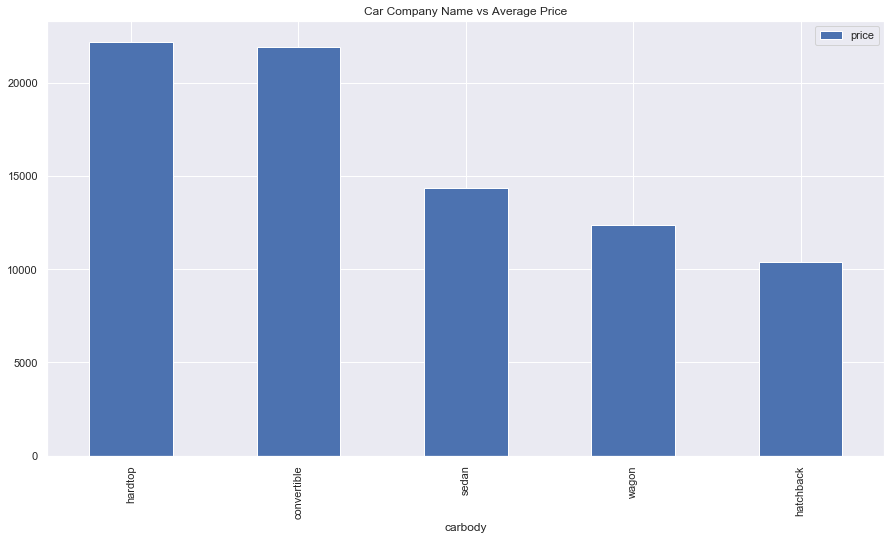

In [27]:
plt.figure(figsize=(20, 6))

df_autoy = pd.DataFrame(cardata.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

Insights:
hardtop and convertible seems to have the highest average price.

In [28]:
#Binning the Car Companies based on avg prices of each car Company.

cardata['price'] = cardata['price'].astype('int')
cardata_temp = cardata.copy()
t = cardata_temp.groupby(['CarName'])['price'].mean()
cardata_temp = cardata_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
cardata['Cars_Category'] = pd.cut(cardata_temp['price_y'],bins,right=False,labels=label)
cardata.head(8)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450,Medium_Range
5,2,audi,gas,std,two,sedan,fwd,front,99.8000,177.3000,66.3000,53.1000,2507,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,15250,Medium_Range
6,1,audi,gas,std,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.7000,2844,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,17710,Medium_Range
7,1,audi,gas,std,four,wagon,fwd,front,105.8000,192.7000,71.4000,55.7000,2954,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,18920,Medium_Range


In [29]:
t.head()

CarName
Mazda        5645.0000 
Nissan       10415.6667
Porsche      32528.0000
Toyota       15750.0000
Volkswagen   9783.3333 
Name: price, dtype: float64

Significant variables after Visualization
Cars_Category , Engine Type, Fuel Type
Car Body , Aspiration , Cylinder Number
Drivewheel , Curbweight , Car Length
Car Length , Car width , Engine Size
Boreratio , Horse Power , Wheel base
citympg , highwaympg , symboling

In [30]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [31]:
cardata = cardata[sig_col]

In [32]:
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype']

In [33]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'
dummies = pd.get_dummies(cardata[sig_cat_col])
dummies.head()

,Cars_Category_Budget_Friendly,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [34]:
dummies = pd.get_dummies(cardata[sig_cat_col], drop_first = True)
dummies.head()

,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
4,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [35]:
dummies.shape

(205, 16)

In [36]:
cardata.head()

,price,Cars_Category,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000
1,16500,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000
2,16500,Medium_Range,ohcv,gas,std,hatchback,six,rwd,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000
3,13950,Medium_Range,ohc,gas,std,sedan,four,fwd,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000
4,17450,Medium_Range,ohc,gas,std,sedan,five,4wd,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000


In [37]:
#2nd Method to convert
cylindernumber = {'eight':8, 'five':5, 'six':6, 'four':4, 'three':3, 'twelve':12, 'two':2}
cardata.cylindernumber = [cylindernumber[item] for item in cardata.cylindernumber]

In [38]:
cardata.head()

,price,Cars_Category,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495,Medium_Range,dohc,gas,std,convertible,4,rwd,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000
1,16500,Medium_Range,dohc,gas,std,convertible,4,rwd,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000
2,16500,Medium_Range,ohcv,gas,std,hatchback,6,rwd,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000
3,13950,Medium_Range,ohc,gas,std,sedan,4,fwd,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000
4,17450,Medium_Range,ohc,gas,std,sedan,5,4wd,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000


In [39]:
# Add the results to the original dataframe
cardata = pd.concat([cardata, dummies], axis = 1)
cardata.shape

(205, 33)

In [40]:
# Drop the original cat variables as dummies are already created
cardata.drop( sig_cat_col, axis = 1, inplace = True)
cardata.shape

(205, 27)

In [41]:
#Convert string to number
#1st Method to convert
#cardata.doornumber[cardata.doornumber =='two']= 2
#cardata.doornumber[cardata.doornumber =='four']= 4

In [42]:
#2nd Method to convert
#cylindernumber = {'eight':8, 'five':5, 'six':6, 'four':4, 'three':3, 'twelve':12, 'two':2}
#cardata.cylindernumber = [cylindernumber[item] for item in cardata.cylindernumber]

In [43]:
cardata.head(3)

,price,cylindernumber,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,13495,4,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,16500,4,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,16500,6,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [44]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'
#dummies_cardata = pd.get_dummies(cardata[sig_cat_col])
#print(dummies_cardata.shape,dummies_cardata.columns)
#pd.get_dummies(data.Country)

#Cars_Category_dummies = pd.get_dummies(cardata.Cars_Category)
#fueltype_dummies =  pd.get_dummies(cardata.fueltype)
#aspiration_dummies = pd.get_dummies(cardata.aspiration)
#carbody_dummies = pd.get_dummies(cardata.carbody)
#drivewheel_dummies = pd.get_dummies(cardata.drivewheel)
#enginelocation_dummies = pd.get_dummies(cardata.enginelocation)
#enginetype_dummies = pd.get_dummies(cardata.enginetype)


#Easy Way to adding dummy columns to the original dataframe
#df = pd.concat([df.drop('YEAR', axis=1), pd.get_dummies(df['YEAR'])], axis=1)
#cardata=pd.concat([cardata.drop('Cars_Category', axis=1), pd.get_dummies(cardata['Cars_Category'])], axis=1)
#cardata=pd.concat([cardata.drop('fueltype', axis=1), pd.get_dummies(cardata['fueltype'])], axis=1)
#cardata=pd.concat([cardata.drop('aspiration', axis=1), pd.get_dummies(cardata['aspiration'])], axis=1)
#cardata=pd.concat([cardata.drop('carbody', axis=1), pd.get_dummies(cardata['carbody'])], axis=1)
#cardata=pd.concat([cardata.drop('drivewheel', axis=1), pd.get_dummies(cardata['drivewheel'])], axis=1)
#cardata=pd.concat([cardata.drop('enginelocation', axis=1), pd.get_dummies(cardata['enginelocation'])], axis=1)
#cardata=pd.concat([cardata.drop('enginetype', axis=1), pd.get_dummies(cardata['enginetype'])], axis=1)

1='Cars_Category_Budget_Friendly', 'Cars_Category_Medium_Range','Cars_Category_TopNotch_Cars', 
2='fueltype_diesel', 'fueltype_gas',
3='aspiration_std', 'aspiration_turbo', 
4='carbody_convertible','carbody_hardtop', 'carbody_hatchback', 'carbody_sedan','carbody_wagon', 
5='drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
6='enginelocation_front', 'enginelocation_rear', 
7='enginetype_dohc','enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf','enginetype_ohcv',       'enginetype_rotor'

In [45]:
cardata.columns

Index(['price', 'cylindernumber', 'wheelbase', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'carlength',
       'carwidth', 'Cars_Category_Medium_Range', 'Cars_Category_TopNotch_Cars',
       'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor'],
      dtype='object')

cardata.rename(columns={'Budget_Friendly': 'Cars_Category_Budget_Friendly'}, inplace=True)
cardata.rename(columns={'Medium_Range': 'Cars_Category_Medium_Range'}, inplace=True)
cardata.rename(columns={'TopNotch_Cars': 'Cars_Category_TopNotch_Cars'}, inplace=True)
cardata.rename(columns={'diesel': 'fueltype_diesel'}, inplace=True)
cardata.rename(columns={'gas': 'fueltype_gas'}, inplace=True)
cardata.rename(columns={'std': 'aspiration_std'}, inplace=True)
cardata.rename(columns={'turbo': 'aspiration_turbo'}, inplace=True)
cardata.rename(columns={'convertible': 'carbody_convertible'}, inplace=True)
cardata.rename(columns={'hardtop': 'carbody_hardtop'}, inplace=True)
cardata.rename(columns={'hatchback': 'carbody_hatchback'}, inplace=True)
cardata.rename(columns={'sedan': 'carbody_sedan'}, inplace=True)
cardata.rename(columns={'wagon': 'carbody_wagon'}, inplace=True)
cardata.rename(columns={'4wd': 'drivewheel_4wd'}, inplace=True)
cardata.rename(columns={'fwd': 'drivewheel_fwd'}, inplace=True)
cardata.rename(columns={'rwd': 'drivewheel_rwd'}, inplace=True)
cardata.rename(columns={'front': 'enginelocation_front'}, inplace=True)
cardata.rename(columns={'rear': 'enginelocation_rear'}, inplace=True)
cardata.rename(columns={'dohc': 'enginetype_dohc'}, inplace=True)
cardata.rename(columns={'dohcv': 'enginetype_dohcv'}, inplace=True)
cardata.rename(columns={'l': 'enginetype_l'}, inplace=True)
cardata.rename(columns={'ohc': 'enginetype_ohc'}, inplace=True)
cardata.rename(columns={'ohcf': 'enginetype_ohcf'}, inplace=True)
cardata.rename(columns={'ohcv': 'enginetype_ohcv'}, inplace=True)
cardata.rename(columns={'rotor': 'enginetype_rotor'}, inplace=True)

#Convert string to number
#1st Method to convert
cardata.doornumber[cardata.doornumber =='two']= 2
cardata.doornumber[cardata.doornumber =='four']= 4

#2nd Method to convert
cylindernumber = {'eight':8, 'five':5, 'six':6, 'four':4, 'three':3, 'twelve':12, 'two':2}
cardata.cylindernumber = [cylindernumber[item] for item in cardata.cylindernumber]

In [46]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
price                          205 non-null int32
cylindernumber                 205 non-null int64
wheelbase                      205 non-null float64
curbweight                     205 non-null int64
enginesize                     205 non-null int64
boreratio                      205 non-null float64
horsepower                     205 non-null int64
citympg                        205 non-null int64
highwaympg                     205 non-null int64
carlength                      205 non-null float64
carwidth                       205 non-null float64
Cars_Category_Medium_Range     205 non-null uint8
Cars_Category_TopNotch_Cars    205 non-null uint8
fueltype_gas                   205 non-null uint8
aspiration_turbo               205 non-null uint8
carbody_hardtop                205 non-null uint8
carbody_hatchback              205 non-null uint8
carbody_sedan                  205 no

In [47]:
cardata.head(1)
cardata.shape

(205, 27)

In [48]:
#Create Features and Label
#features = finalDF.iloc[:,0:6].values
#label = finalDF.iloc[:,[6]].values
#features0 = cardata.iloc[:,0:18]
#features1 = cardata.iloc[:,19:44]

In [49]:
#data2 = pd.concat([ dummyDF , remainingDF ] , axis = 1)
#feature = pd.concat([features0,features1],axis = 1)
#feature.head(3)

In [50]:
features = cardata.iloc[:,1:27]
features.head()
#features.shape

,cylindernumber,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,4,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,6,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
3,4,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
4,5,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [51]:
label = cardata.iloc[:,[0]]
label.shape

(205, 1)

In [52]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
feature = scale.fit_transform(features)

In [54]:
feature

array([[0.2       , 0.05830904, 0.41117145, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.05830904, 0.41117145, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.2303207 , 0.51784329, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.4       , 0.65597668, 0.59115593, ..., 0.        , 1.        ,
        0.        ],
       [0.4       , 0.65597668, 0.67067494, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.65597668, 0.61055081, ..., 0.        , 0.        ,
        0.        ]])

In [55]:
# For loop to check ideal sample that will give generalized model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for i in range(1,101):
    X_train,X_test,y_train,y_test = train_test_split(feature,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=i)
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    train_score=model.score(X_train,y_train)
    test_score=model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Test: {} Train: {} RandomState: {}".format(test_score,train_score,i))

Test: 0.9442750942598512 Train: 0.9337361814950536 RandomState: 3
Test: 0.9632131144034196 Train: 0.932266801094508 RandomState: 5
Test: 0.9429409179824765 Train: 0.9371394594684042 RandomState: 9
Test: 0.9462700843723015 Train: 0.9346885794664241 RandomState: 16
Test: 0.9532998958797786 Train: 0.9353148648158844 RandomState: 44
Test: 0.9473710451983034 Train: 0.9343676977108163 RandomState: 46
Test: 0.9515126137888965 Train: 0.9284614581073852 RandomState: 56
Test: 0.9496949115357853 Train: 0.9329551141492415 RandomState: 57
Test: 0.9418298556564105 Train: 0.9373767459673369 RandomState: 63
Test: 0.9412839677004706 Train: 0.9354553985726466 RandomState: 66
Test: 0.9730920341825054 Train: 0.9192913397202557 RandomState: 67
Test: 0.9481126465687468 Train: 0.9351686111696265 RandomState: 79


In [56]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,
                                                   label,
                                                   test_size=0.2,
                                                   random_state=67)

In [57]:
#Implment Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train) #Used to create equation of line

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))
        #Actual  #Predicted Label

0.9730920341825054

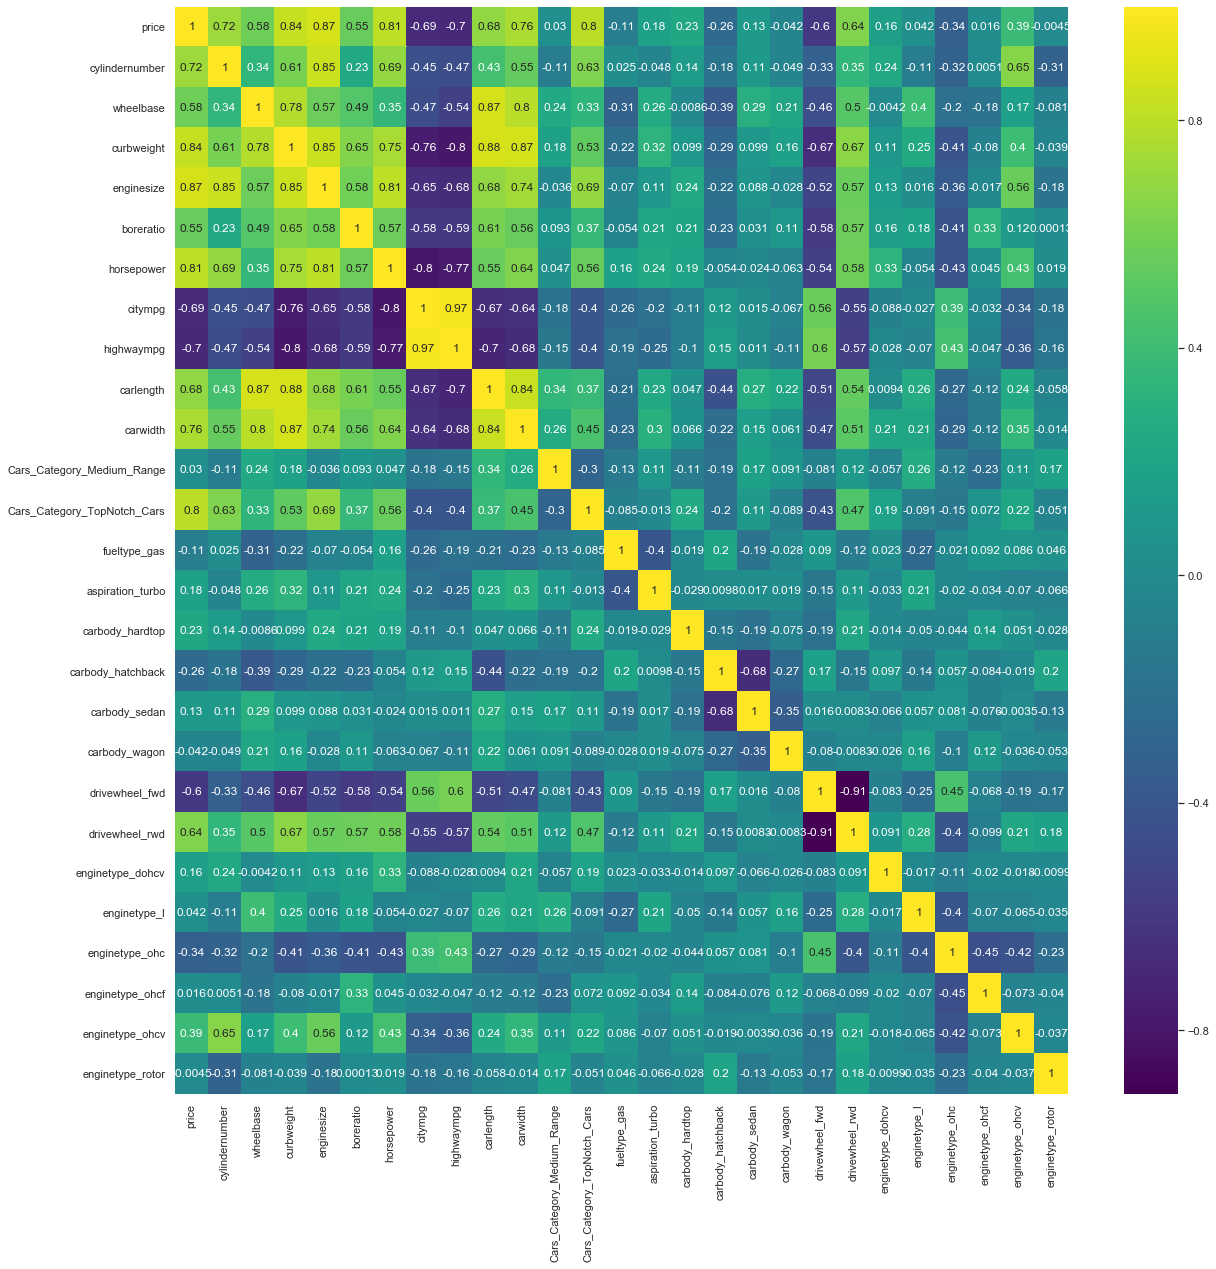

In [59]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(cardata.corr(),annot=True, cmap="viridis")
plt.show()

In [60]:
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']

In [61]:
rfe = RFE(model, 15)             
rfe = rfe.fit(feature, label)

In [62]:
list(zip(features.columns,rfe.support_,rfe.ranking_))

[('cylindernumber', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('citympg', False, 3),
 ('highwaympg', True, 1),
 ('carlength', False, 5),
 ('carwidth', True, 1),
 ('Cars_Category_Medium_Range', False, 4),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 10),
 ('aspiration_turbo', False, 12),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 7),
 ('drivewheel_rwd', False, 9),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 8),
 ('enginetype_ohc', False, 6),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', False, 11),
 ('enginetype_rotor', True, 1)]

In [63]:
from sklearn.feature_selection import SelectKBest,chi2

In [64]:
select_feature = SelectKBest(chi2,k=15).fit(X_train,y_train)

In [65]:
selected_features_df = pd.DataFrame({'Feature':list(features.columns),
                                    'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores',ascending=False)

,Feature,Scores
25,enginetype_rotor,161.0000
14,carbody_hardtop,157.0000
24,enginetype_ohcv,155.0000
11,Cars_Category_TopNotch_Cars,150.0000
21,enginetype_l,145.5455
23,enginetype_ohcf,145.1667
17,carbody_wagon,137.4348
13,aspiration_turbo,128.5152
15,carbody_hatchback,111.6531
19,drivewheel_rwd,103.6102


In [66]:

rfe = RFE(model,step=1)             
rfe = rfe.fit(X_train, y_train)

In [67]:
selected_features_rfe = pd.DataFrame({'Feature':list(features.columns),
                                    'Ranking':rfe.ranking_})
selected_features_rfe.sort_values(by='Ranking',ascending=True)

,Feature,Ranking
0,cylindernumber,1
17,carbody_wagon,1
16,carbody_sedan,1
15,carbody_hatchback,1
14,carbody_hardtop,1
11,Cars_Category_TopNotch_Cars,1
9,carwidth,1
25,enginetype_rotor,1
2,curbweight,1
6,citympg,1


In [68]:
list(zip(features.columns,rfe.support_,rfe.ranking_))

[('cylindernumber', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 2),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 6),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('Cars_Category_Medium_Range', False, 4),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 8),
 ('aspiration_turbo', False, 9),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 7),
 ('drivewheel_rwd', False, 11),
 ('enginetype_dohcv', False, 14),
 ('enginetype_l', False, 13),
 ('enginetype_ohc', False, 5),
 ('enginetype_ohcf', False, 3),
 ('enginetype_ohcv', False, 10),
 ('enginetype_rotor', True, 1)]

In [69]:
features1 = features.iloc[:,[0,11,9,25,2,6,5,4,1]]
features1

,cylindernumber,Cars_Category_TopNotch_Cars,carwidth,enginetype_rotor,curbweight,citympg,horsepower,boreratio,wheelbase
0,4,0,64.1000,0,2548,21,111,3.4700,88.6000
1,4,0,64.1000,0,2548,21,111,3.4700,88.6000
2,6,0,65.5000,0,2823,19,154,2.6800,94.5000
3,4,0,66.2000,0,2337,24,102,3.1900,99.8000
4,5,0,66.4000,0,2824,18,115,3.1900,99.4000
5,5,0,66.3000,0,2507,19,110,3.1900,99.8000
6,5,0,71.4000,0,2844,19,110,3.1900,105.8000
7,5,0,71.4000,0,2954,19,110,3.1900,105.8000
8,5,0,71.4000,0,3086,17,140,3.1300,105.8000
9,5,0,67.9000,0,3053,16,160,3.1300,99.5000


In [70]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
feature1 = scale.fit_transform(features1)
label=scale.fit_transform(label)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for i in range(1,101):
    X_train,X_test,y_train,y_test = train_test_split(feature1,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=i)
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    train_score=model.score(X_train,y_train)
    test_score=model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Test: {} Train: {} RandomState: {}".format(test_score,train_score,i))

Test: 0.9414673319936825 Train: 0.8966257355509378 RandomState: 3
Test: 0.9558531555096402 Train: 0.8961748524670802 RandomState: 5
Test: 0.9331431522439098 Train: 0.9032549486276618 RandomState: 9
Test: 0.9186062865335346 Train: 0.9054700204291215 RandomState: 15
Test: 0.9446163836441994 Train: 0.8980707534736342 RandomState: 16
Test: 0.9136935860355138 Train: 0.9047986234219161 RandomState: 17
Test: 0.9207470803278461 Train: 0.899787764945718 RandomState: 18
Test: 0.9272928480927849 Train: 0.900249882346214 RandomState: 28
Test: 0.9237496279756758 Train: 0.9031496475816754 RandomState: 31
Test: 0.913691927304052 Train: 0.9073271334509605 RandomState: 34
Test: 0.9155356673314883 Train: 0.9036231935821557 RandomState: 35
Test: 0.9183719885618683 Train: 0.9050434987007355 RandomState: 36
Test: 0.9259173739426374 Train: 0.9048578343047522 RandomState: 44
Test: 0.9381374954296027 Train: 0.8982840472406707 RandomState: 46
Test: 0.9161445234612459 Train: 0.9060888450592943 RandomState: 50
T

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature1,
                                                   label,
                                                   test_size=0.2,
                                                   random_state=5)

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))
        #Actual  #Predicted Label

0.9543948713098283

In [74]:
cylindernumber = float(input("cylindernumber:"))
carCategoryTopnotch = float(input("Is Car Top Notch (Yes means 1 ):"))
carwidth = float(input("Width of the car in mm:"))
rotor = float(input("Is Engine Rotary (Yes means 1 ):"))
curbweight = float(input("Curb Weight of the car in Kgs:"))
citympg = float(input("Mileage of the car in city:"))
horsepower = float(input("Power of the car in BHP:"))
boreratio = float(input("Bore Ratio of the Engine"))
wheelbase = float(input("Wheel base in mm:"))
Price = model.predict(np.array([[cylindernumber,carCategoryTopnotch,carwidth,rotor,curbweight,citympg,horsepower,boreratio,wheelbase],]))
print("The predicted price {}".format(Price))

cylindernumber:4
Is Car Top Notch (Yes means 1 ):1
Width of the car in mm:2480
Is Engine Rotary (Yes means 1 ):0
Curb Weight of the car in Kgs:685
Mileage of the car in city:21
Power of the car in BHP:120
Bore Ratio of the Engine3.4
Wheel base in mm:4500
The predicted price [[592.04445798]]


In [ ]:
features.iloc[:,[0,11,9,25,2,6,5,4,1]]